# 카카오코테- 신규아이디추천

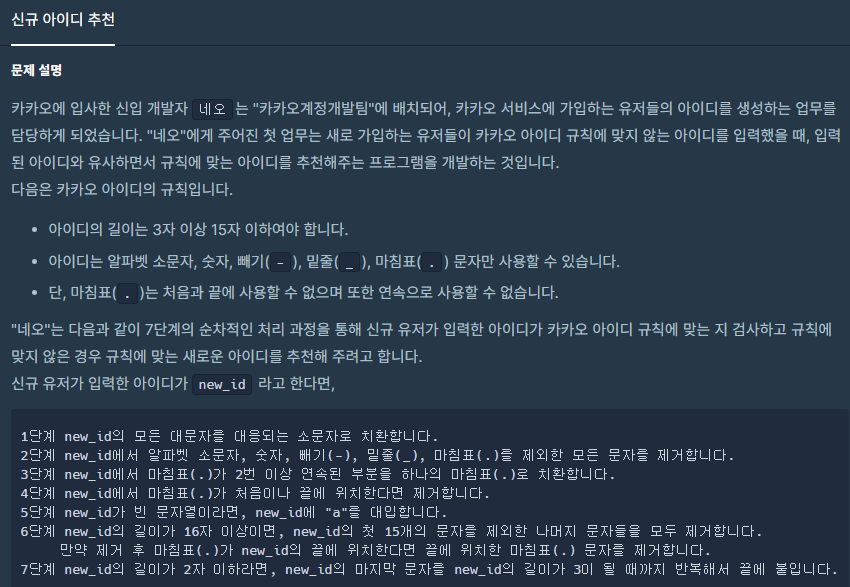

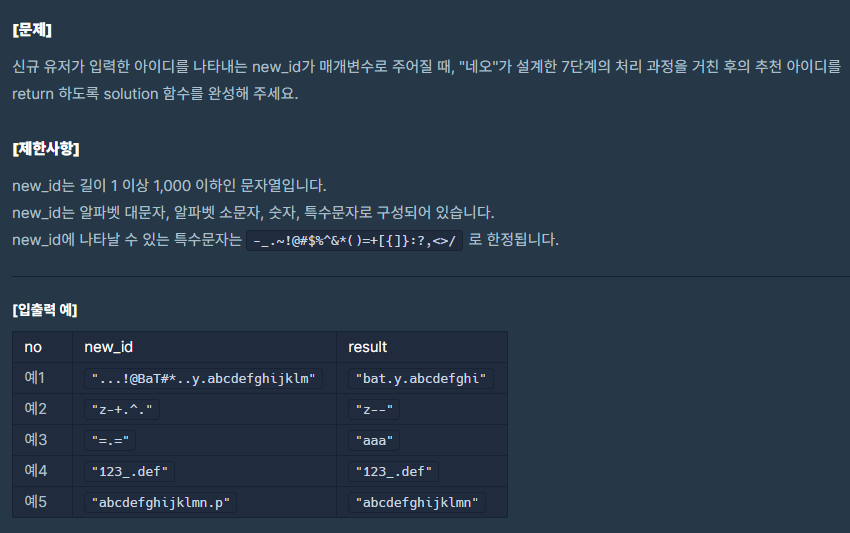

## 나의 풀이

하라는대로 하면 되는 전형적인 1번 문제

조건 4번과 6번의 위치를 바꾸고, 5번을 적절한 위치에 넣어줌

In [ ]:
#.는 처음과 끝 x, 연속 x
#1. alpha > small
#2.알파벳, 숫자, -,_,. 아닌거 제거
#3. .. > .
#4 . 마지막 > 제거
#5. 빈문자열 > a
#6. len(string) >=16 > string[:16] > 마지막 .제거
#7. len(string) <=2 > 마지막 문자 3될때 까지 반복
def solution(new_id):
    answer = ''
    lst = []
    #1,2
    for cha in new_id:
        if cha.isdigit():
            lst.append(cha)
        elif cha.isalpha():
            lst.append(cha.lower())
        elif cha in ['-','_','.']:
            lst.append(cha)
    
    if len(lst) ==0:
        lst = ['a','a','a']
    
    #3
    double_dot =0
    while True:
        if double_dot == 1:
            break
        double_dot = 1
        
        for idx in range(len(lst)-1):
            if lst[idx:idx+2] == ['.','.']:
                lst.pop(idx)
                double_dot = 0
                break
                
    if lst[0] =='.':
        lst = lst[1:]
    
            
    #6. len(string) >=16 > string[:16] > 마지막 .제거
    if len(lst)>=16:
        lst = lst[:15]
    #4
    while True:
        if len(lst) == 0:
            lst = ['a','a','a']
            break
        
        if lst[-1] =='.':
            lst.pop()
        else:
            break

    #7. len(string) <=2 > 마지막 문자 3될때 까지 반복
    if len(lst) <=2:
        lst.extend([lst[-1]]* (3-len(lst)))
    
    for i in lst:
        answer+=i
    return answer

## 이렇게 풀고 싶은 코드
굉장히 깔끔하게 푸셨다

In [ ]:
def solution(new_id):
    answer = ''
    # 1
    new_id = new_id.lower()
    # 2
    for c in new_id:
        if c.isalpha() or c.isdigit() or c in ['-', '_', '.']:
            answer += c
    # 3
    while '..' in answer:
        answer = answer.replace('..', '.')
    # 4
    if answer[0] == '.':
        answer = answer[1:] if len(answer) > 1 else '.'
    if answer[-1] == '.':
        answer = answer[:-1]
    # 5
    if answer == '':
        answer = 'a'
    # 6
    if len(answer) > 15:
        answer = answer[:15]
        if answer[-1] == '.':
            answer = answer[:-1]
    # 7
    while len(answer) < 3:
        answer += answer[-1]
    return answer

### 미친 풀이

re를 이렇게까지 잘 사용할수있다니 존경스러울 뿐이다.

In [ ]:
import re

def solution(new_id):
    st = new_id
    st = st.lower()
    st = re.sub('[^a-z0-9\-_.]', '', st)
    st = re.sub('\.+', '.', st)
    st = re.sub('^[.]|[.]$', '', st)
    st = 'a' if len(st) == 0 else st[:15]
    st = re.sub('^[.]|[.]$', '', st)
    st = st if len(st) > 2 else st + "".join([st[-1] for i in range(3-len(st))])
    return st